In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.figure_factory as ff


from nltk.corpus import stopwords

from wordcloud import WordCloud

In [2]:
reviews = pd.read_json("data.json")

reviews.head(10)

,app_title,review_content,score,at,tokens,bigrams
0,Daylio Journal - Mood Tracker,"Best journal ever, especially if you need to t...",5,1668491463000,"[best, journal, ever, especi, need, goal, use,...","[best journal, journal ever, ever especially]"
1,Daylio Journal - Mood Tracker,I LOVE THIS! I've been using this for a little...,5,1668432800000,"[love, use, littl, year, veri, proud, tell, ki...","[kinda rare, long especially, especially keepi..."
2,Daylio Journal - Mood Tracker,I absolutely love this app! I have always trie...,5,1668388151000,"[absolut, love, alway, tri, keep, journal, pap...","[absolutely love, always tried, motivation how..."
3,Daylio Journal - Mood Tracker,App really wants your money. Literally won't s...,1,1668387779000,"[realli, want, money, liter, stop, e, beg, mon...","[really wants, money literally, stop e, e begg..."
4,Daylio Journal - Mood Tracker,Menus few Agua quasi,5,1668308854000,"[menus, agua, quasi]",[agua quasi]
5,Daylio Journal - Mood Tracker,This app is honestly so amazing!! I have ADHD ...,5,1668278309000,"[honest, amaz, adhd, issu, want, habit, journa...","[custom reminders, much easier, people like, p..."
6,Daylio Journal - Mood Tracker,Nothing nice app super cool I do think it shou...,3,1668207410000,"[noth, nice, super, cool, think, recommend, ev...","[nothing nice, super cool]"
7,Daylio Journal - Mood Tracker,I have gotten into the habit of using this mul...,5,1668200890000,"[gotten, habit, use, multipl, time, day, see, ...","[multiple times, seeing patterns]"
8,Daylio Journal - Mood Tracker,"Love the app after using it for years, but aft...",4,1668160521000,"[love, use, year, latest, updat, photo, upload...","[latest update, entries keep, keep getting, ge..."
9,Daylio Journal - Mood Tracker,"Edit: I've logged over 1000 entries now, still...",4,1668138574000,"[edit, log, entri, still, love, last, updat, p...","[still love, last update, picture adding, addi..."


[Text(0, 0, 'Daylio Journal - Mood Tracker'),
 Text(1, 0, 'Symptom & Mood Tracker'),
 Text(2, 0, 'Moodflow: Mood Tracker'),
 Text(3, 0, 'eMoods Bipolar Mood Tracker'),
 Text(4, 0, 'Mood Tracker: Self-Care Habits'),
 Text(5, 0, 'Mood Tracker Journal'),
 Text(6, 0, 'Moodtrack Social Diary'),
 Text(7, 0, 'Reflectly: Mood Tracker Diary'),
 Text(8, 0, 'Mood Log'),
 Text(9, 0, 'CBT Thought Diary'),
 Text(10, 0, 'Moodpress - Mood Diary Tracker'),
 Text(11, 0, 'Tochi - Mood Tracker, Journal'),
 Text(12, 0, 'Pixels - Mood & Mental Health'),
 Text(13, 0, 'Mood Patterns'),
 Text(14, 0, 'Chiku – Journal & Mood Tracker'),
 Text(15, 0, 'uMore - mental health tracker'),
 Text(16, 0, 'Feelyou: Social mood tracker'),
 Text(17, 0, 'Mood Potatoes - Mood Tracker |'),
 Text(18, 0, 'Mind journal: Diary, Mood trac'),
 Text(19, 0, 'MOODA'),
 Text(20, 0, 'DailyBean: Simplest Journal'),
 Text(21, 0, 'MoodPanda Mood Diary'),
 Text(22, 0, 'EMMO'),
 Text(23, 0, 'Mood Meter'),
 Text(24, 0, 'Emolog - Mood Tracker, D

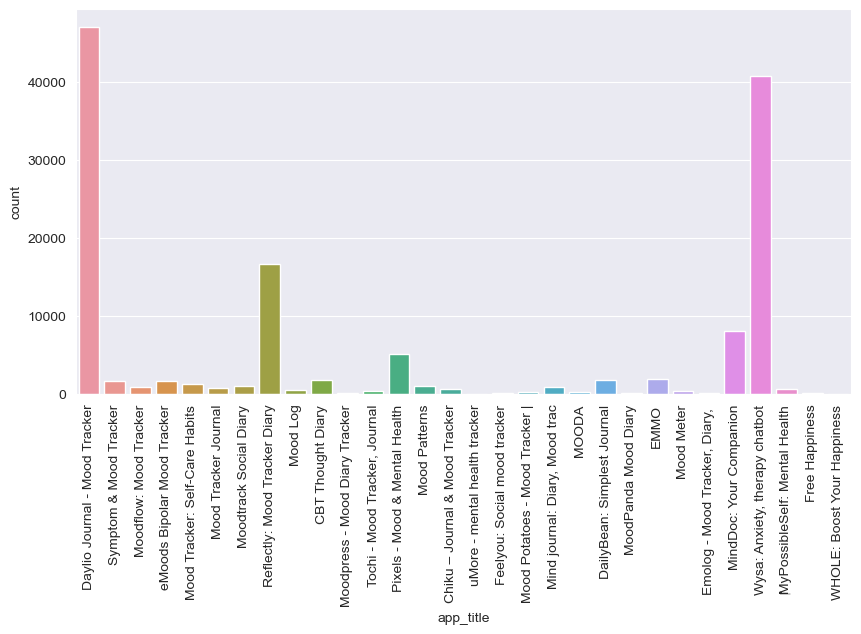

In [8]:
plt.figure(figsize=(10,5))

chart = sns.countplot(x="app_title", data=reviews)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135913 entries, 0 to 135912
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   app_title       135913 non-null  object
 1   review_content  135913 non-null  object
 2   score           135913 non-null  int64 
 3   at              135913 non-null  int64 
 4   tokens          135913 non-null  object
 5   bigrams         135913 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.3+ MB


In [10]:
reviews["app_title"] = reviews["app_title"].astype(str)
reviews["review_content"] = reviews["review_content"].astype(str)

In [12]:
reviews["review_content"] = reviews["review_content"].apply(str.strip)


## Preprocess

In [13]:
txt = " ".join(rev for rev in reviews.review_content)

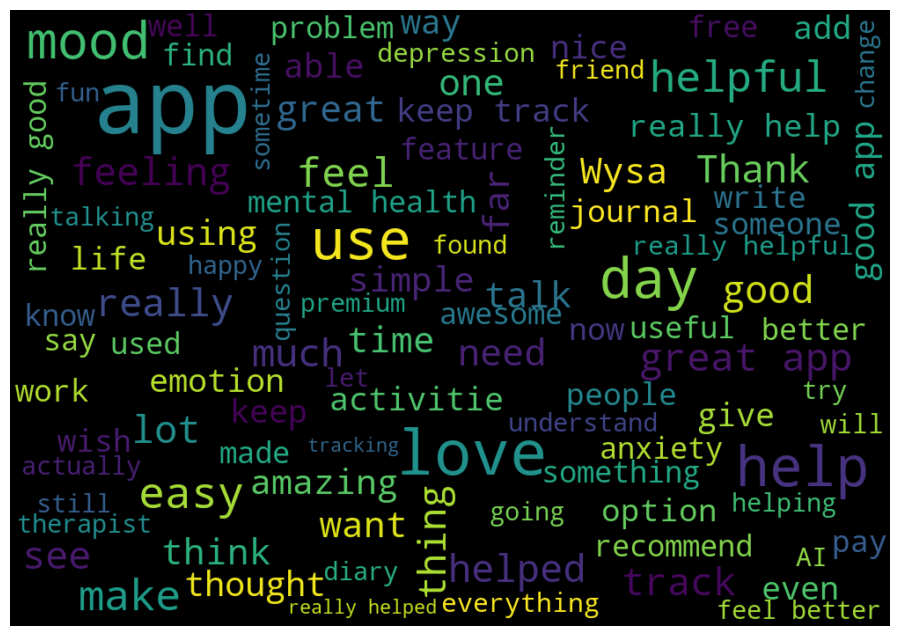

In [17]:
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
    background_color="black",
    max_font_size=100,
    max_words=100,
    width=1000,
    height=700
).generate(txt)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def normalize(text):
    text = preprocessing.normalize.hyphenated_words(text)
    text = preprocessing.normalize.quotation_marks(text)
    text = preprocessing.normalize.unicode(text)
    text = preprocessing.remove.accents(text)
    return text


In [22]:
import regex as re

RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """
    returns the share of suspicious characters in a text
    :param text:
    :param min_len:
    :return:
    """

    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)


reviews["impurity"] = reviews["review_content"].apply(impurity)


In [24]:
reviews[["review_content", "impurity"]].sort_values(by="impurity", ascending=False).head(10)


,review_content,impurity
36462,Expand😂I am random 😊][][][][][][][][][][][✓✓✓×...,0.268293
23749,#Good #easy #fun #memory,0.166667
44672,&lt;3 - &lt;3,0.153846
69963,"this app is ########, you have to pay for EVER...",0.150943
85034,LOVE THE NEW UPDATE!! {>♡<},0.148148
82010,I LOVE THIS APP EVERYONE SHOUND GET THIS LET E...,0.138211
593,[Content deleted],0.117647
73464,کیوت و باحاله>~<💓,0.117647
94827,really love it :]],0.111111
82731,it's a cute app ><,0.111111


In [18]:
reviews.count()

app_title         135913
review_content    135913
score             135913
at                135913
tokens            135913
bigrams           135913
dtype: int64

In [19]:
reviews.drop_duplicates(["review_content", "score"], inplace=True)

In [20]:
reviews.count()

app_title         123621
review_content    123621
score             123621
at                123621
tokens            123621
bigrams           123621
dtype: int64

In [21]:
reviews.sample(10)

,app_title,review_content,score,at,tokens,bigrams
76857,Pixels - Mood & Mental Health,a simple app that's I'm excited to build up an...,4,1547701784000,"[simpl, excit, build, use, reflect, month]",[]
118463,"Wysa: Anxiety, therapy chatbot",Really cute and helpful 💕,5,1593068693000,"[realli, cute, help]",[really cute]
72971,CBT Thought Diary,Great app. Has been very handy to have this on...,4,1586172576000,"[great, veri, handi, mobil, devic, would, reco...","[mobile device, device would, would recommend,..."
17329,Daylio Journal - Mood Tracker,I like it a lot.,4,1551141702000,"[like, lot]",[]
40994,Daylio Journal - Mood Tracker,"I love this little app, and I'm an older adult...",5,1485760252000,"[love, littl, older, adult, like, various, way...","[older adult, various ways, quite simple]"
46377,Daylio Journal - Mood Tracker,Really convenient and nice,4,1460402267000,"[realli, conveni, nice]",[really convenient]
1462,Daylio Journal - Mood Tracker,absolutely love this app. paid version is wort...,5,1641634244000,"[absolut, love, paid, version, worth]","[absolutely love, paid version]"
15407,Daylio Journal - Mood Tracker,I've only been using Daylio for about a week. ...,4,1556081440000,"[onli, use, week, far, experi, great]",[]
80116,Chiku – Journal & Mood Tracker,nice interface. simple and useful,5,1646308795000,"[nice, interfac, simpl, use]","[nice interface, interface simple]"
76804,Pixels - Mood & Mental Health,great alternate diary,5,1547922447000,"[great, altern, diari]","[great alternate, alternate diary]"


In [ ]:
from textacy import preprocessing

cleaning_pipeline = preprocessing.make_pipeline(
    preprocessing.replace.user_handles,
    preprocessing.replace.emojis,


)